 ** Meta Analysis and External Validation**

 1. data GSE171110: 44 severe covid-19 patients and 10 Healthy  
 2. data GSE163151: 7 hospitalized COVID-19 vs  20 Healthy patients 
 3. data GSE152641: 62 COVID-19 patients vs 24 healthy controls  
 4. data GSE172114: 46 critical COVID-19 vs 23 non-critical COVID19

In [ ]:
#Dependencies
library(metaRNASeq)
library(org.Hs.eg.db)
library(UpSetR)
library(ggvenn)
library(ggplot2)

**PreProcessing**

Step1 :Data Preparation:  1. different Gene Identifiers converted to ntrezGeneID
                          2. all have the same columns and data type in each columns
                          3. all have the same unit for example logFC values are in log2 scale in all data
                          4. all had the same filtering out genes with low counts 
                          5. all had the same normalization method before EdgeR analysis: TMM
                          6. missing value omiting:

In [ ]:
#data GSE171110   #44 severe covid-19 patients and 10 Healthy
deseqdata110 <- read.table(file = "GSE171110/DEseq2_All_result.txt",header=TRUE, row.names=1, sep="", check.names=FALSE)
edgedata110 <- read.table(file = "GSE171110/edgR_all result_covidvshealthy",header=TRUE, row.names=1, sep=",", check.names=FALSE)
#making a column with corresponding Entrz gene ID
entrez_ids <- mapIds(org.Hs.eg.db, keys = rownames(deseqdata110), column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
deseqdata110$EntrezGeneID <- entrez_ids[rownames(deseqdata110)]
entrez_ids <- mapIds(org.Hs.eg.db, keys = rownames(edgedata110), column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
edgedata110$EntrezGeneID <- entrez_ids[rownames(edgedata110)]
deseqdata110$GeneSymbol<-rownames(deseqdata110)
edgedata110$GeneSymbol<-rownames(edgedata110)

In [ ]:
#data GSE163151 #hospitalized COVID-19: 7 samples , Healthy: 20 samples
deseqdata151 <- read.table(file = "GSE163151/DEseq All covid_healthy result.txt",header=TRUE, sep=",", check.names=FALSE)
edgedata151 <- read.table(file = "GSE163151/edgR_all_result_healthyvscovid.csv",header=TRUE, row.names=1, sep=",", check.names=FALSE)
#making a column with corresponding Entrz gene ID
entrez_ids <- mapIds(org.Hs.eg.db, keys = rownames(deseqdata151), column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
deseqdata151$EntrezGeneID <- entrez_ids[rownames(deseqdata151)]
entrez_ids <- mapIds(org.Hs.eg.db, keys = rownames(edgedata151), column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
edgedata151$EntrezGeneID <- entrez_ids[rownames(edgedata151)]
deseqdata151$GeneSymbol<-rownames(deseqdata151)
edgedata151$GeneSymbol<-rownames(edgedata151)

# influenza vs healthy
inf151 <- read.table(file = "GSE163151/edgR_all_result_healthyvsinf.csv",header=TRUE, row.names=1, sep=",", check.names=FALSE)
entrez_ids <- mapIds(org.Hs.eg.db, keys = rownames(inf151), column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
inf151$EntrezGeneID <- entrez_ids[rownames(inf151)]
inf151$GeneSymbol<-rownames(inf151)

# bacterial infection vs healthy
bac151 <- read.table(file = "GSE163151/edgR_all_result_healthyvsbac.csv",header=TRUE, row.names=1, sep=",", check.names=FALSE)
entrez_ids <- mapIds(org.Hs.eg.db, keys = rownames(bac151), column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
bac151$EntrezGeneID <- entrez_ids[rownames(bac151)]
bac151$GeneSymbol<-rownames(bac151)


In [ ]:
#GSE152641 #62 COVID-19 patients vs 24 healthy controls
deseqdata641 <- read.table(file = "GSE152641/DESeq2 All results.txt", header=TRUE, row.names=1, sep="", check.names=FALSE)
edgedata641 <- read.table(file = "GSE152641/EdgR All results.txt", header=TRUE, row.names=1, sep="", check.names=FALSE)
# Create EntrezGeneID
deseqdata641$EntrezGeneID <- rownames(deseqdata641)
edgedata641$EntrezGeneID <- rownames(edgedata641)
# Map Entrez IDs to Gene Symbols
gene_symbols_deseq <- mapIds(org.Hs.eg.db, keys = rownames(deseqdata641), column = "SYMBOL", keytype = "ENTREZID", multiVals = "first")
gene_symbols_edge <- mapIds(org.Hs.eg.db, keys = rownames(edgedata641), column = "SYMBOL", keytype = "ENTREZID", multiVals = "first")
# Assign Gene Symbols to the data frames
deseqdata641$GeneSymbol <- gene_symbols_deseq[rownames(deseqdata641)]
edgedata641$GeneSymbol <- gene_symbols_edge[rownames(edgedata641)]


In [180]:
#data GSE172114 #46 critical , 23 non-critical COVID19
#there is no DESeq2 results because of normalization of original data
edgedata114 <- read.table(file = "GSE172114/EdgeR all result",header=TRUE, row.names=1, sep=",", check.names=FALSE)
dim(edgedata114)
library(org.Hs.eg.db)
gene_symbols <- sub(".*_", "", rownames(edgedata114))
entrez_ids <- mapIds(org.Hs.eg.db, keys = gene_symbols, column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
edgedata114$EntrezGeneID <- entrez_ids[gene_symbols]
edgedata114$GeneSymbol <- gene_symbols
head(edgedata114)


[1] 15957     5

'select()' returned 1:many mapping between keys and columns



,logFC,logCPM,F,PValue,FDR,EntrezGeneID,GeneSymbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSG00000119714.10_GPR68,1.6107857,2.503416,106.25953,7.886445e-16,1.258440e-11,8111,GPR68
ENSG00000134545.13_KLRC1,1.7860245,2.786699,88.62662,3.492714e-14,2.480526e-10,3821,KLRC1
ENSG00000007264.14_MATK,1.5619836,4.046020,87.35693,4.663519e-14,2.480526e-10,4145,MATK
ENSG00000273047.1_RP4-583P15.14,1.1644053,2.820845,83.10987,1.247982e-13,4.691434e-10,NA,RP4-583P15.14
ENSG00000099622.13_CIRBP,0.7252374,6.888404,82.41462,1.470024e-13,4.691434e-10,1153,CIRBP
ENSG00000149823.7_VPS51,0.9524669,6.297903,79.31469,3.079226e-13,7.579722e-10,738,VPS51


In [181]:
#Merging different datasets together

# Removing NAs  
MR641<-deseqdata641[!is.na(deseqdata641$GeneSymbol),]
MR151<-deseqdata151[!is.na(deseqdata151$GeneSymbol),]
MR110<-deseqdata110[!is.na(deseqdata110$GeneSymbol),]
# Merging data frames based on GeneSymbol
df1 <- MR641[, c("GeneSymbol", "padj", "log2FoldChange","baseMean","lfcSE")]
df2 <- MR151[, c("GeneSymbol", "padj", "log2FoldChange","baseMean","lfcSE")]
df3 <- MR110[, c("GeneSymbol", "padj", "log2FoldChange","baseMean","lfcSE")]
merged_df0 <- merge(merge(df1, df2, by = "GeneSymbol", all = TRUE), df3, by = "GeneSymbol", all = TRUE)
merged_df <- merged_df0[complete.cases(merged_df0$GeneSymbol), ]
# Setting GeneSymbol as row names
rownames(merged_df) <- merged_df$GeneSymbol
merged_df$GeneSymbol <- NULL  # Remove redundant GeneSymbol column
colnames(merged_df) <- c("pval641","FC641","baseMean641","lfcSE641","pval151","FC151","baseMean151","lfcSE151","pval110","FC110","baseMean110","lfcSE110")
head(merged_df)
dim(merged_df)
dim(MR641)
dim(MR151)
dim(MR110)
dim(merged_df0)
dim(merged_df)
na_counts <- rowSums(is.na(merged_df))
 sum(na_counts <= 0)
 sum(na_counts <= 1)
#write.table(merged_df, file = "dseqmerged.txt", row.names = T, col.names = T, quote = F)

,pval641,FC641,baseMean641,lfcSE641,pval151,FC151,baseMean151,lfcSE151,pval110,FC110,baseMean110,lfcSE110
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0.021343475,-0.8539164,5.44056,0.3219830,0.1677109,-0.7337442,11.763785,0.4065774,0.178717429,-0.1839214,78.850310,0.1136161
A1BG_AS1,NA,NA,NA,NA,0.1741600,-1.2812531,4.764781,0.7216433,NA,NA,NA,NA
A1CF,0.004961396,0.9794048,10.68313,0.3063447,0.1143338,-2.7294646,17.701652,1.3111754,0.274960101,0.4352421,6.380028,0.3245492
A2M,0.649366483,-0.1293646,1268.09606,0.2146932,0.2276078,0.7581095,341.388743,0.4818206,0.146841451,0.4157708,41.067909,0.2396970
A2M_AS1,NA,NA,NA,NA,0.2497307,0.7140570,73.072888,0.4771452,NA,NA,NA,NA
A2ML1,0.010344599,0.7072489,16.47994,0.2411158,0.1223940,-2.7274589,26.988457,1.3424316,0.004946548,0.7672777,36.093265,0.2422568


[1] 39663    12

[1] 20420     8

[1] 26485     8

[1] 30185     8

[1] 39663    13

[1] 39663    12

[1] 15304

[1] 16540

In [183]:
# EdgeR data validation:  #edgedata641 #edgedata151 #edgedata110 #edgedata114
MR641<-edgedata641[!is.na(edgedata641$GeneSymbol),] #31 NA
MR151<-edgedata151[!is.na(edgedata151$GeneSymbol),] #no na
MR110<-edgedata110[!is.na(edgedata110$GeneSymbol),]
MR114<-edgedata114[!is.na(edgedata114$GeneSymbol),] 
IN151<-inf151[!is.na(inf151$GeneSymbol),]
BA151<-bac151[!is.na(bac151$GeneSymbol),]

# Merging data frames based on GeneSymbol
e_df1 <- MR641[, c("GeneSymbol", "FDR")]
e_df2 <- MR151[, c("GeneSymbol", "FDR")]
e_df3 <- MR110[, c("GeneSymbol", "FDR")]
e_df4 <- MR114[, c("GeneSymbol", "FDR")]
merged_df <- Reduce(function(x, y) merge(x, y, by = "GeneSymbol", all = TRUE, suffixes = c("", unique(y)[2])),
                    list(MR641[, c("GeneSymbol", "FDR")],
                         MR151[, c("GeneSymbol", "FDR")],
                         MR110[, c("GeneSymbol", "FDR")],
                         MR114[, c("GeneSymbol", "FDR")]))
# Removing rows with NA values in GeneSymbol
merged_df <- merged_df[complete.cases(merged_df$GeneSymbol), ]
# unique row names
merged_df <- merged_df[!duplicated(merged_df$GeneSymbol), ]
# Setting GeneSymbol as row names
rownames(merged_df) <- merged_df$GeneSymbol
merged_df$GeneSymbol <- NULL  # Removing redundant GeneSymbol column
colnames(merged_df) <- c("MR641_pvalue", "MR151_pvalue", "MR110_pvalue", "MR114_pvalue")
head(merged_df)
dim(merged_df)
dim(MR641)
dim(MR151)
dim(MR110)
dim(MR114)
dim(merged_df0)
dim(merged_df)
na_counts <- rowSums(is.na(merged_df))
 sum(na_counts <= 0)
 sum(na_counts <= 1)

,MR641_pvalue,MR151_pvalue,MR110_pvalue,MR114_pvalue
,<dbl>,<dbl>,<dbl>,<dbl>
3,NA,NA,NA,0.6720760
A.1,NA,NA,NA,0.9211075
A1BG,0.02630700,0.41789470,0.3612863,0.3586577
A1BG-AS1,NA,NA,NA,0.5951423
A1BG_AS1,NA,0.26286060,NA,NA
A1CF,0.01950028,0.02651242,NA,NA


[1] 29817     4

[1] 17723     7

[1] 24431     7

[1] 15327     7

[1] 15957     7

[1] 39663    13

[1] 29817     4

[1] 11567

[1] 13439

** External Validation**

[1] "KIFC1"   "SPC24"   "CDC20"   "DDR2"    "MCM2"    "GLDC"    "RAPGEF5"
 [8] "CHPF"    "CENPM"   "DERL3"   "ITGA8"

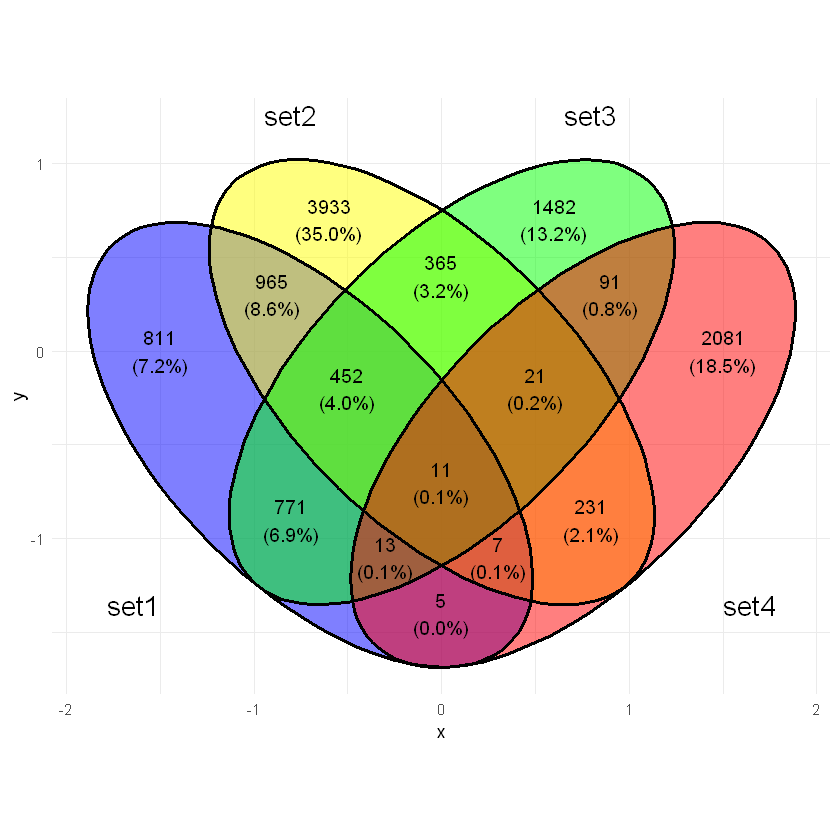

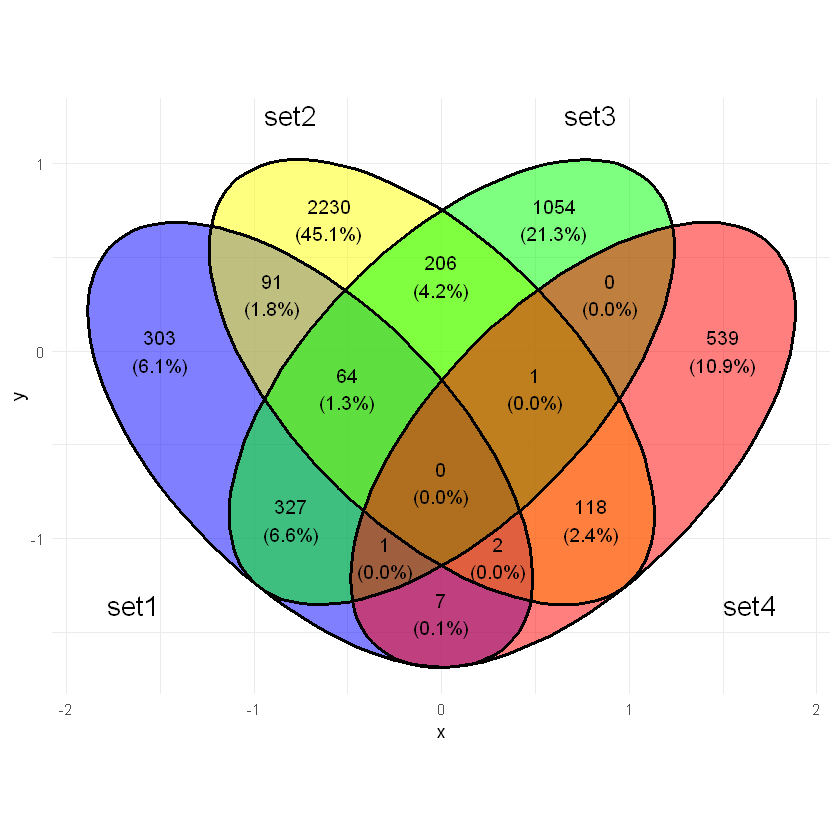

In [184]:

# Filter for upregulated genes
sig_MR641_up <- na.omit(MR641[MR641$FDR <= 0.05 & as.numeric(as.character(MR641$logFC)) > 0.6,])
sig_MR151_up <- na.omit(MR151[MR151$FDR <= 0.05 & as.numeric(as.character(MR151$logFC)) > 0.6,])
sig_MR110_up <- na.omit(MR110[MR110$FDR <= 0.05 & as.numeric(as.character(MR110$logFC)) > 0.6,])
sig_MR114_up <- na.omit(MR114[MR114$FDR <= 0.05 & as.numeric(as.character(MR114$logFC)) > 0.6,])

# Filter for downregulated genes
sig_MR641_down <- na.omit(MR641[MR641$FDR <= 0.05 & as.numeric(as.character(MR641$logFC)) < -0.6,])
sig_MR151_down <- na.omit(MR151[MR151$FDR <= 0.05 & as.numeric(as.character(MR151$logFC)) < -0.6,])
sig_MR110_down <- na.omit(MR110[MR110$FDR <= 0.05 & as.numeric(as.character(MR110$logFC)) < -0.6,])
sig_MR114_down <- na.omit(MR114[MR114$FDR <= 0.05 & as.numeric(as.character(MR114$logFC)) < -0.6,])

# Create gene sets for upregulated and downregulated genes
gene_sets_up <- list(
  set1 = sig_MR641_up$GeneSymbol,
  set2 = sig_MR151_up$GeneSymbol,
  set3 = sig_MR110_up$GeneSymbol,
  set4 = sig_MR114_up$GeneSymbol)

gene_sets_down <- list(
  set1 = sig_MR641_down$GeneSymbol,
  set2 = sig_MR151_down$GeneSymbol,
  set3 = sig_MR110_down$GeneSymbol,
  set4 = sig_MR114_down$GeneSymbol)

# Plot Venn diagram for upregulated genes
cv4_up<- Reduce(intersect, list(sig_MR641_up$GeneSymbol, sig_MR151_up$GeneSymbol, sig_MR110_up$GeneSymbol, sig_MR114_up$GeneSymbol))
cv4_up
venn_plot_up <- ggvenn(gene_sets_up)
venn_plot_up + theme_minimal()
ggsave("venn_upregulated_0.05_f6.png", plot = venn_plot_up, width = 6, height = 6, dpi = 300)

# Plot Venn diagram for downregulated genes
venn_plot_down <- ggvenn(gene_sets_down)
venn_plot_down + theme_minimal()
ggsave("venn_downregulated_0.05_f6.png", plot = venn_plot_down, width = 6, height = 6, dpi = 300)


In [185]:
#EdgeR upset plot for external validation
gene_sets_2 <- list(
  "GSE152641: Severe vs Healthy" = sig_MR641_pvalue_2$GeneSymbol,
  "GSE163151: Severe vs Healthy" = sig_MR151_pvalue_2$GeneSymbol,
  "GSE171110: Severe vs Healthy" = sig_MR110_pvalue_2$GeneSymbol,
  "GSE172114: Severe vs Non-Severe" = sig_MR114_pvalue_2$GeneSymbol,
  "GSE163151: Influenza vs Healthy" = sig_IN151_pvalue_2$GeneSymbol,
  "GSE163151: Bacterial vs Healthy" = sig_BA151_pvalue_2$GeneSymbol)

png("upset_edge6.png", width = 1000, height = 800)  
color_range <- colorRampPalette(c("grey", "#006400"))(6)
upset(
  fromList(gene_sets_2),
  sets = c("GSE152641: Severe vs Healthy", "GSE163151: Severe vs Healthy", "GSE171110: Severe vs Healthy", "GSE172114: Severe vs Non-Severe", "GSE163151: Influenza vs Healthy", "GSE163151: Bacterial vs Healthy"),
  main.bar.color = color_range[2],  
  matrix.color = color_range[5],   
  sets.bar.color =  color_range[1],  
  order.by = "freq",              
  keep.order = TRUE,               
  line.size = 1.5,                 
  point.size = 4,                
  text.scale = 1.5                
)
dev.off()

png 
  2

**Meta-Analysis**

In [ ]:
#Meta-analysis using metaRNASeq #deseq2 
aligned_110 <- deseqdata110[match(deseqdata641$GeneSymbol, deseqdata110$GeneSymbol), ]
aligned_641 <- deseqdata641
aligned_151 <- deseqdata151[match(deseqdata641$GeneSymbol, deseqdata151$GeneSymbol), ]
pvalues_110 <- aligned_110$pvalue
pvalues_641 <- aligned_641$pvalue
pvalues_151 <- aligned_151 $pvalue
 # Combine p-values
pvalues_list <- list(pvalues_110, pvalues_641, pvalues_151)
fishcomb <- fishercomb(pvalues_list, BHth = 0.05)
DE <- ifelse(fishcomb$adjpval <= 0.05, 1, 0)
#hist(fishcomb$rawpval, nclass = 100)
##
threshold <- 0.05
DEGs <- which(fishcomb$adjpval <= threshold)
DEGs_symbols <- aligned_110$GeneSymbol[DEGs] 
DEGs0.05 <- data.frame(GeneSymbol = DEGs_symbols, AdjustedPValue = fishcomb$adjpval[DEGs])
threshold <- 0.01
DEGs <- which(fishcomb$adjpval <= threshold)
DEGs_symbols <- aligned_110$GeneSymbol[DEGs] 
DEGs0.01 <- data.frame(GeneSymbol = DEGs_symbols, AdjustedPValue = fishcomb$adjpval[DEGs])

In [188]:
#library(metaRNASeq) #deseq2
# Align datasets based on GeneSymbol
aligned_110 <- deseqdata110[match(deseqdata641$GeneSymbol, deseqdata110$GeneSymbol), ]
aligned_641 <- deseqdata641  # Assuming this is the reference
aligned_151 <- deseqdata151[match(deseqdata641$GeneSymbol, deseqdata151$GeneSymbol), ]
pvalues_110 <- aligned_110$pvalue
pvalues_641 <- aligned_641$pvalue
pvalues_151 <- aligned_151$pvalue
# Combine p-values using Fisher's method
pvalues_list <- list(pvalues_110, pvalues_641, pvalues_151)
fishcomb <- fishercomb(pvalues_list, BHth = 0.05)
# Thresholds for significance in meta-analysis
threshold <- 0.05
DEGs <- which(fishcomb$adjpval <= threshold)
#Filtering DEGs based on log2 fold change > 1 in all datasets
log2fc_filter <- (abs(aligned_110$log2FoldChange) > 1) & 
                 (abs(aligned_641$log2FoldChange) > 1) & 
                 (abs(aligned_151$log2FoldChange) > 1)
# Combining log2 fold change filter with DEGs from meta-analysis
DEGs_log2fc <- DEGs[log2fc_filter[DEGs]]
# Extracting Gene Symbols and other data for filtered DEGs
DEGs_symbols_log2fc <- aligned_110$GeneSymbol[DEGs_log2fc]
DEGs_log2fc_data <- data.frame(GeneSymbol = DEGs_symbols_log2fc, 
                               AdjustedPValue = fishcomb$adjpval[DEGs_log2fc],
                               Log2FoldChange_110 = aligned_110$log2FoldChange[DEGs_log2fc],
                               Log2FoldChange_641 = aligned_641$log2FoldChange[DEGs_log2fc],
                               Log2FoldChange_151 = aligned_151$log2FoldChange[DEGs_log2fc])

#  results
head(DEGs_log2fc_data)
dim(DEGs_log2fc_data)
r_deg<- na.omit(DEGs_log2fc_data)
#write.table(r_deg, file = "Meta0.05FC1.txt", row.names = F, col.names = T, quote = F)
num_NAs <- sum(is.na(DEGs_log2fc_data$GeneSymbol))
print(num_NAs)
length(na.omit(DEGs_log2fc_data$GeneSymbol))

,GeneSymbol,AdjustedPValue,Log2FoldChange_110,Log2FoldChange_641,Log2FoldChange_151
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,AANAT,2.407720e-13,1.804251,1.116094,-1.585752
2,AOC1,1.785008e-11,4.388124,1.856963,-2.462022
3,NA,NA,NA,NA,NA
4,ACRV1,2.999458e-07,1.517637,1.653269,-2.684987
5,ADARB2,5.007140e-08,2.447301,2.262584,-2.140483
6,ADCYAP1,4.408903e-02,1.087800,1.615285,-2.948123


[1] 1378    5

[1] 536


[1] 842

** Jacknife Analysis**

In [189]:
# deseq2_ Function to exclude one dataset and perform meta-analysis
perform_meta_analysis <- function(exclude_dataset) {
  datasets <- list("110" = deseqdata110, "641" = deseqdata641, "151" = deseqdata151)
  # Removing the dataset to be excluded
  datasets <- datasets[names(datasets) != exclude_dataset]
  # Aligning datasets
  aligned_datasets <- lapply(datasets, function(dataset) {
    dataset[match(deseqdata641$GeneSymbol, dataset$GeneSymbol), ]  })

  # Combining p-values using Fisher's method
  pvalues_list <- lapply(aligned_datasets, function(dataset) dataset$pvalue)
  fishcomb <- fishercomb(pvalues_list, BHth = 0.05)
  
  # cutoffs
  threshold <- 0.01
  DEGs <- which(fishcomb$adjpval <= threshold)
  log2fc_filter <- Reduce("&", lapply(aligned_datasets, function(dataset) abs(dataset$log2FoldChange) > 1))
  DEGs_log2fc <- DEGs[log2fc_filter[DEGs]]
  return(data.frame(GeneSymbol = datasets[[1]]$GeneSymbol[DEGs_log2fc],
                    AdjustedPValue = fishcomb$adjpval[DEGs_log2fc]))
}
# jackknife analysis
jackknife_results <- list()
datasets_to_exclude <- c("110", "641", "151")
for (dataset in datasets_to_exclude) {
  jackknife_results[[dataset]] <- perform_meta_analysis(dataset)
}
sapply(jackknife_results, nrow)


110  641  151 
1748 1770 1366

    Results:
    When excluding dataset "110", 1748 DEGs were identified.
    When excluding dataset "641", 1770 DEGs were identified.
    When excluding dataset "151", 1366 DEGs were identified.
the exclusion of dataset "151" results in a notably lower number of DEGs compared to the other two datasets, suggesting that this dataset might have more different information.


In [190]:
#  EdgeR Function to perform meta-analysis excluding one dataset
perform_meta_analysis <- function(exclude_dataset) {
  datasets <- list(  "641" = edgedata641,"110" = edgedata110, 
                    "114" = edgedata114,"151" = edgedata151)
  # Remove the dataset to be excluded
  datasets <- datasets[names(datasets) != exclude_dataset]
  # Choosing reference dataset (first in the list)
  ref_dataset <- datasets[[1]]
  # Aligning datasets based on GeneSymbol of the new reference
  aligned_datasets <- lapply(datasets, function(dataset) {
    dataset[match(ref_dataset$GeneSymbol, dataset$GeneSymbol), ]  })

  # Combine p-values using Fisher's method
  pvalues_list <- lapply(aligned_datasets, function(dataset) dataset$FDR)
  fishcomb <- fishercomb(pvalues_list, BHth = 0.05)
  # cutoff filters
  threshold <- 0.05
  DEGs <- which(fishcomb$adjpval <= threshold)
  log2fc_filter <- Reduce("&", lapply(aligned_datasets, function(dataset) abs(dataset$logFC) > 1))
  DEGs_log2fc <- DEGs[log2fc_filter[DEGs]]
  return(data.frame(GeneSymbol = ref_dataset$GeneSymbol[DEGs_log2fc],
                    AdjustedPValue = fishcomb$adjpval[DEGs_log2fc]))
}
# jackknife analysis
jackknife_results <- list()
datasets_to_exclude <- c("110", "641", "151", "114")
for (dataset in datasets_to_exclude) {
  jackknife_results[[dataset]] <- perform_meta_analysis(dataset)}
sapply(jackknife_results, nrow)
length(na.omit(jackknife_results[[1]][,1]))
length(na.omit(jackknife_results[[2]][,1]))
length(na.omit(jackknife_results[[3]][,1]))
length(na.omit(jackknife_results[[4]][,1]))

110  641  151  114 
1672 1086 1445 1760

[1] 117

[1] 168

[1] 194

[1] 413

In [191]:
# Function to count occurrences of each DEG
count_DEGs <- function(jackknife_results) {
    # Combine all DEGs into a single vector
    all_DEGs <- unlist(lapply(jackknife_results, function(df) df$GeneSymbol))
    DEG_counts <- table(all_DEGs)
    DEG_counts_df <- as.data.frame(DEG_counts, stringsAsFactors = FALSE)
    names(DEG_counts_df) <- c("GeneSymbol", "Count")
    return(DEG_counts_df)
}
DEG_counts_df <- count_DEGs(jackknife_results)
length(DEG_counts_df[,2])

[1] 580

In [192]:
# Aligning datasets based on GeneSymbol  #order matter
aligned_110 <- edgedata110[match(edgedata641$GeneSymbol, edgedata110$GeneSymbol), ]
aligned_641 <- edgedata641  # Assuming this is the reference
aligned_151 <- edgedata151[match(edgedata641$GeneSymbol, edgedata151$GeneSymbol), ]
aligned_114 <- edgedata114[match(edgedata641$GeneSymbol, edgedata114$GeneSymbol), ]
library(dplyr)
# gene expression direction
get_direction <- function(logFC) {
  if (is.na(logFC)) {
    return("NA")
  } else if (logFC > 0) {
    return("up")
  } else if (logFC < 0) {
    return("down")
  } else {
    return("neutral")
  }
}
aligned_110$direction <- sapply(aligned_110$logFC, get_direction)
aligned_641$direction <- sapply(aligned_641$logFC, get_direction)
aligned_151$direction <- sapply(aligned_151$logFC, get_direction)
aligned_114$direction <- sapply(aligned_114$logFC, get_direction)
combined_data <- data.frame(
  GeneSymbol = aligned_641$GeneSymbol,
  pvalue_110 = aligned_110$FDR,
  pvalue_641 = aligned_641$FDR,
  pvalue_151 = aligned_151$FDR,
  pvalue_114 = aligned_114$FDR,
  direction_110 = aligned_110$direction,
  direction_641 = aligned_641$direction,
  direction_151 = aligned_151$direction,
  direction_114 = aligned_114$direction
)
 
head(combined_data)

,GeneSymbol,pvalue_110,pvalue_641,pvalue_151,pvalue_114,direction_110,direction_641,direction_151,direction_114
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,POLQ,1.186459e-09,1.870338e-15,0.25991867,5.260173e-01,up,up,up,up
2,CDC6,6.565456e-10,4.459916e-13,0.01062613,3.307016e-01,up,up,up,up
3,PBXIP1,4.377858e-03,4.459916e-13,0.09037740,1.113442e-06,down,down,down,up
4,TSPYL1,2.791278e-07,4.459916e-13,0.52797908,1.669998e-06,down,down,down,up
5,TUBB2A,3.435324e-01,4.459916e-13,0.01999790,5.542502e-01,up,down,down,up
6,H2BC6,3.755677e-08,4.459916e-13,NA,NA,up,up,NA,NA


**inconsistency code**

In [193]:
library(dplyr)
# Function to find the majority direction
majority_direction <- function(directions) {
  valid_directions <- directions[directions %in% c("up", "down")]
  if (length(valid_directions) == 0) {
    return(NA)
  }
  # Find which direction is more common
  most_common <- sort(table(valid_directions), decreasing = TRUE)
  if (length(most_common) == 0) {
    return(NA)
  } else {
    return(names(most_common)[1])
  }
}
#  majority direction for each gene
combined_data$majority_direction <- apply(combined_data[, grep("direction_", names(combined_data))], 1, majority_direction)
# count inconsistencies for each dataset
count_inconsistencies <- function(dataset_direction, majority_direction) {
  sum(dataset_direction != majority_direction & !is.na(dataset_direction) & majority_direction != "NA", na.rm = TRUE)}
dataset_names <- c("direction_110", "direction_641", "direction_151", "direction_114")
#  inconsistency counts
inconsistency_counts <- data.frame(Dataset = gsub("direction_", "", dataset_names), Inconsistencies = integer(length(dataset_names)))
for (i in seq_along(dataset_names)) {
  dataset_direction <- combined_data[[dataset_names[i]]]
  inconsistency_counts$Inconsistencies[i] <- count_inconsistencies(dataset_direction, combined_data$majority_direction)
}
print(inconsistency_counts)


  Dataset Inconsistencies
1     110            7867
2     641            3259
3     151            4852
4     114           12579


**META-Analysis and visualisations**

Exc Set 3 Exc Set 1 Exc Set 2 
     2588      1542      1779 


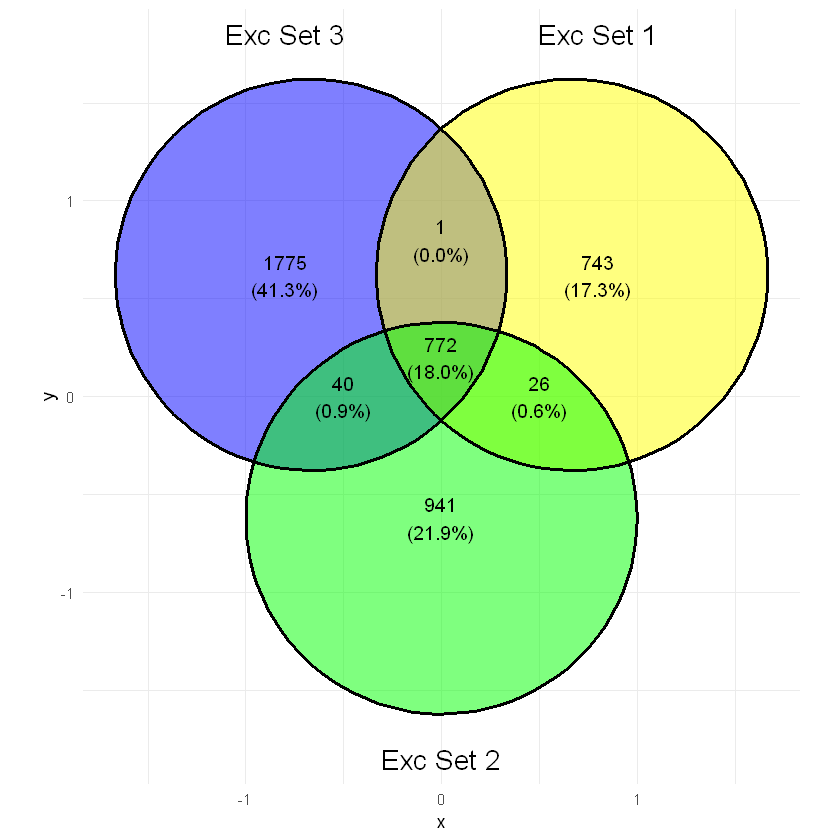

In [208]:
#without 114
#jacknife with all cutoff: (pval,direction, foldchange)
library(dplyr)
library(ggvenn)
# Thresholds and cutoffs
threshold <- 0.05
fc_cutoff <- 0.6
count_threshold <- 2  #it should be max 2 because of jacknife( its betwewn 2 in 3 meta)

# Function for combined direction of gene expression
get_combined_direction <- function(logFC_values) {
  if (all(logFC_values > 0, na.rm = TRUE)) {
    return("up")
  } else if (all(logFC_values < 0, na.rm = TRUE)) {
    return("down")
  } else {
    return("mixed")
  }
}
# Function for jackknife 
run_jackknife_analysis <- function(exclude_index) {
  # Exclude one dataset
  included_datasets <- dataset_list[-exclude_index]
  # Create a combined dataset with unique column names
  combined_data <- do.call(cbind, lapply(seq_along(included_datasets), function(i) {
    dataset <- included_datasets[[i]]
    setNames(dataset, paste0(names(dataset), "_", i))
  }))
head(combined_data)
  # Ensure GeneSymbol columns are consistent across datasets
  gene_symbol_cols <- grep("GeneSymbol_", names(combined_data), value = TRUE)
  combined_data$GeneSymbol <- combined_data[, gene_symbol_cols[1]]
  combined_data <- combined_data[, !names(combined_data) %in% gene_symbol_cols[-1]]
  # Combine p-values using Fisher's method for included datasets
  pvalues_list <- lapply(included_datasets, function(dataset) dataset$FDR)
  fishcomb <- fishercomb(pvalues_list, BHth = 0.05)
  
  # Apply the fold change, direction, and p-value criteria
  combined_data <- combined_data %>% 
    filter(fishcomb$adjpval <= threshold) %>%
    mutate(direction = apply(select(., starts_with("logFC_")), 1, get_combined_direction)) %>%
    mutate(upregulated_count = rowSums(select(., starts_with("logFC_")) > fc_cutoff, na.rm = TRUE),
           downregulated_count = rowSums(select(., starts_with("logFC_")) < -fc_cutoff, na.rm = TRUE)) %>%
    rowwise() %>%
    filter((direction == "up" && upregulated_count >= count_threshold) |
           (direction == "down" && downregulated_count >= count_threshold))
  # Return the significant gene symbols
  return(combined_data$GeneSymbol)
}
# List of all datasets (excluding dataset 114)
dataset_list <- list(aligned_110, aligned_641, aligned_151)

# Running the jackknife analysis
jackknife_results <- lapply(seq_along(dataset_list), run_jackknife_analysis)
robust_genes <- Reduce(intersect, jackknife_results)
names(jackknife_results) <- c("Exc Set 3", "Exc Set 1", "Exc Set 2")

# Counting the number of DEGs for each jackknife iteration
non_na_counts <- sapply(jackknife_results, function(gene_list) length(na.omit(gene_list)))
print(non_na_counts)
# Create Venn diagram
venn_plot <- ggvenn(jackknife_results)
venn_plot + theme_minimal()
 ggsave("venn_jacknife.png", plot = venn_plot, width = 6, height = 6, dpi = 300)
 #write.table(robust_genes, file = "MetaRobust.txt", row.names = F, col.names = T, quote = F)

In [197]:
#Main Meta with 3 dataset
# meta-analysis edgeR
# Align datasets based on GeneSymbol  #order matter
aligned_110 <- edgedata110[match(edgedata641$GeneSymbol, edgedata110$GeneSymbol), ]
aligned_641 <- edgedata641  # Assuming this is the reference
aligned_151 <- edgedata151[match(edgedata641$GeneSymbol, edgedata151$GeneSymbol), ]
library(dplyr)
# gene expression direction
get_direction <- function(logFC) {
  if (is.na(logFC)) {
    return("NA")
  } else if (logFC > 0) {
    return("up")
  } else if (logFC < 0) {
    return("down")
  } else {
    return("neutral")
  }
}
aligned_110$direction <- sapply(aligned_110$logFC, get_direction)
aligned_641$direction <- sapply(aligned_641$logFC, get_direction)
aligned_151$direction <- sapply(aligned_151$logFC, get_direction)
combined_data <- data.frame(
  GeneSymbol = aligned_641$GeneSymbol,
  pvalue_110 = aligned_110$FDR,
  pvalue_641 = aligned_641$FDR,
  pvalue_151 = aligned_151$FDR,
  direction_110 = aligned_110$direction,
  direction_641 = aligned_641$direction,
  direction_151 = aligned_151$direction
)
# Combine p-values using Fisher's method
pvalues_list <- list(combined_data$pvalue_110, combined_data$pvalue_641, combined_data$pvalue_151)
fishcomb <- fishercomb(pvalues_list, BHth = 0.05)
DEGs <- which(fishcomb$adjpval <= threshold)
print("DEGs0.05 up and down")
length(DEGs)
combined_data$combined_pval <- fishcomb$adjpval
significant_DEGs <- combined_data %>% 
  filter(combined_pval <= threshold) %>%
  rowwise() %>%
  filter(all(c(direction_110, direction_641, direction_151) == "up") | all(c(direction_110, direction_641, direction_151) == "down"))
upregulated_DEGs <- filter(significant_DEGs, direction_110 == "up")
downregulated_DEGs <- filter(significant_DEGs, direction_110 == "down")
print("upregulated_DEGs0.05 with same direction")
dim(upregulated_DEGs)
print("downregulated_DEGs0.05 with same direction")
dim(downregulated_DEGs)
# fold change cutoff
fc_cutoff <- 0.6   #0.6 about 1.5 time 
combined_data$logFC_110 <- aligned_110$logFC
combined_data$logFC_641 <- aligned_641$logFC
combined_data$logFC_151 <- aligned_151$logFC
combined_data$upregulated_count <- rowSums(select(combined_data, starts_with("logFC")) > fc_cutoff, na.rm = TRUE)
combined_data$downregulated_count <- rowSums(select(combined_data, starts_with("logFC")) < -fc_cutoff, na.rm = TRUE)
significant_DEGs <- combined_data %>% 
  filter(combined_pval <= threshold) %>%
  rowwise() %>%
  filter((all(c(direction_110, direction_641, direction_151) == "up") && upregulated_count >= 3) | 
         (all(c(direction_110, direction_641, direction_151) == "down") && downregulated_count >= 3))
Fupregulated_DEGs <- filter(significant_DEGs, direction_110 == "up")
Fdownregulated_DEGs <- filter(significant_DEGs, direction_110 == "down")
print("upregulated_DEGs0.05 with same direction and fold change cutoff")
dim(Fupregulated_DEGs)
print("downregulated_DEGs0.05 with same direction and fold change cutoff")
dim(Fdownregulated_DEGs)

[1] "DEGs0.05 up and down"


[1] 11263

[1] "upregulated_DEGs0.05 with same direction"


[1] 1942    8

[1] "downregulated_DEGs0.05 with same direction"


[1] 2093    8

[1] "upregulated_DEGs0.05 with same direction and fold change cutoff"


[1] 748  13

[1] "downregulated_DEGs0.05 with same direction and fold change cutoff"


[1] 97 13

In [198]:
#upregulated and dowregulated of 114 dataset   f:0.6, f:1,  fdr:0.05
up_114 <- edgedata114 %>%
  filter(
    (FDR < 0.05),
    (logFC >= 0.6) )
down_114 <- edgedata114 %>%
  filter(
    (FDR < 0.05),
    (logFC <= -0.6) )
dim(up_114)
dim(down_114)
up114<-up_114[,c("GeneSymbol","FDR")]
down114<-down_114[,c("GeneSymbol","FDR")]
#write.table(up114, file = "up114.txt", row.names = F, col.names = T, quote = F)
#write.table(down114, file = "down114.txt", row.names = F, col.names = T, quote = F)
up_114_f1 <- edgedata114 %>%
  filter(
    (FDR < 0.05),
    (logFC >= 0.6) )
down_114_f1 <- edgedata114 %>%
  filter(
    (FDR < 0.05),
    (logFC <= -0.6) )
dim(up_114_f1)
dim(down_114_f1)
up114_f1<-up_114_f1[,c("GeneSymbol","FDR")]
down114_f1<-down_114_f1[,c("GeneSymbol","FDR")]
#write.table(up114_f1, file = "up114_f1.txt", row.names = F, col.names = T, quote = F)
#write.table(down114_f1, file = "down114_f1.txt", row.names = F, col.names = T, quote = F)

[1] 2813    7

[1] 800   7

[1] 2813    7

[1] 800   7

** Finding common genes  between MataAnalysis and jacknife analysis **

GeneSymbol,combined_pval
<chr>,<dbl>
CDC6,0.000000e+00
CLSPN,0.000000e+00
CDCA2,0.000000e+00
RRM2,0.000000e+00
MS4A4A,1.448148e-12
EPSTI1,1.501895e-10


[1] 748   2

[1] 97  2

[1] "CDC6"   "CLSPN"  "CDCA2"  "RRM2"   "MS4A4A" "EPSTI1"

[1] 845

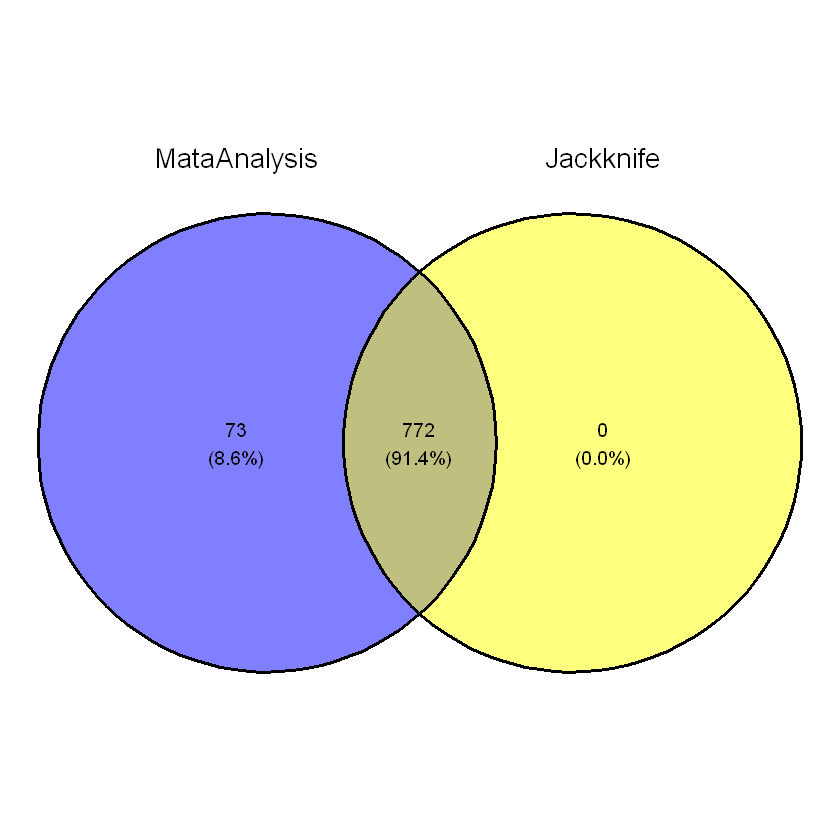

In [199]:
# robust down regulated and upregulated genes
upMeta<-Fupregulated_DEGs[,c("GeneSymbol","combined_pval")]
downMeta<-Fdownregulated_DEGs[,c("GeneSymbol","combined_pval")]
head(upMeta)
#write.table(upMeta, file = "upMeta.txt", row.names = F, col.names = T, quote = F)
#write.table(downMeta, file = "downMeta.txt", row.names = F, col.names = T, quote = F)
dim(upMeta)
dim(downMeta)
# Combine the GeneSymbol columns from both upMeta and downMeta
all_significant_genes <- c(upMeta$GeneSymbol, downMeta$GeneSymbol)
head(all_significant_genes)
length(all_significant_genes)
#common genes between Meta results and highly robust genes in jackknife analysis
venn_j_M_l <- list(
  "MataAnalysis" = all_significant_genes,
  "Jackknife" = robust_genes)

# Create Venn diagram for all DEGs
venn_j_M  <- ggvenn(venn_j_M_l)
venn_j_M

** Severity Markers**

[1] 3825    2

[1] 992   2

[1] 748   2

[1] "KIFC1"   "CD38"    "TRIP13"  "ZWINT"   "SDC1"    "ORC1"    "TXNDC5" 
 [8] "CAV1"    "SPC24"   "CDC20"   "NT5DC2"  "RAD51"   "BHLHA15" "CCNE1"  
[15] "DDR2"    "MCM2"    "SDF2L1"  "GLDC"    "RAPGEF5" "CHPF"    "CENPM"  
[22] "CDCA7"   "ITM2C"   "FAM111B" "DERL3"   "KLHL14"  "ITGA8"

[1] 97  2

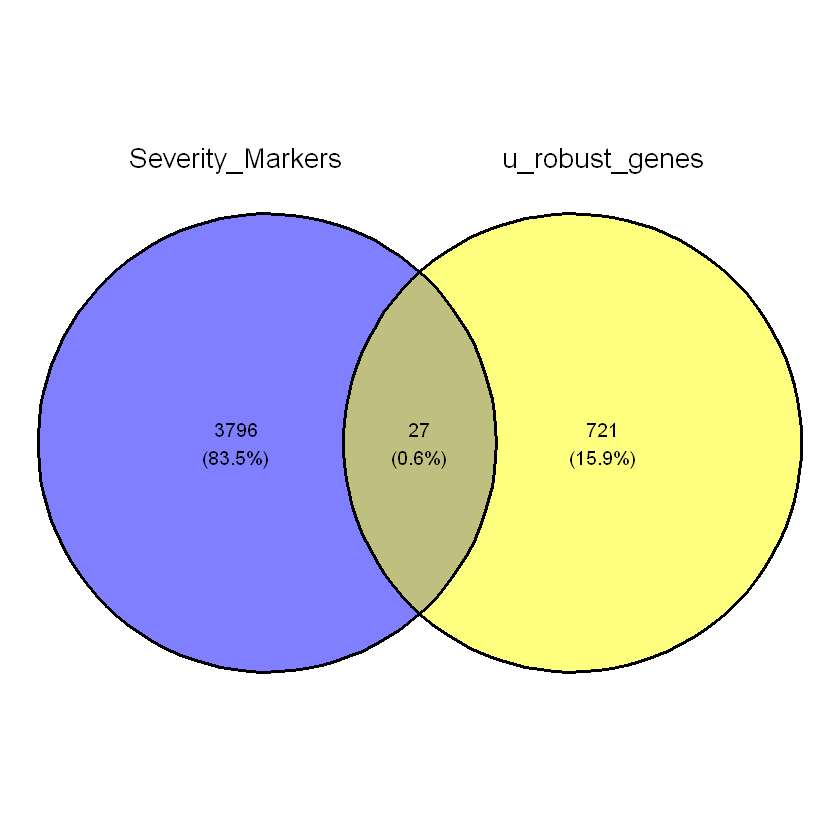

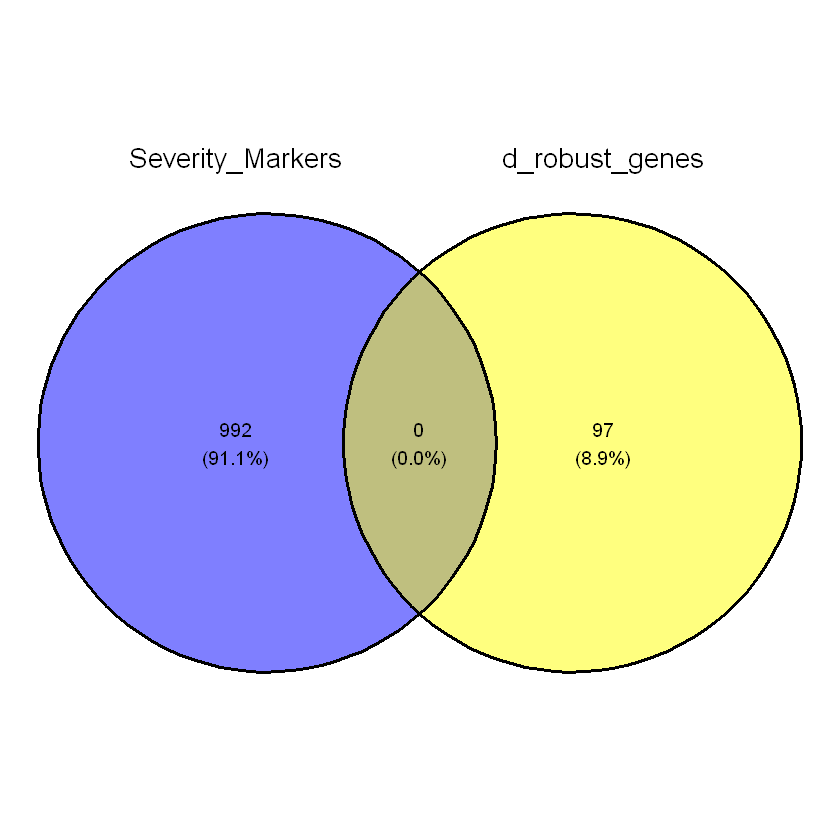

In [202]:
# venn between up meta and up114, down meta and down 114
up_114 <- edgedata114 %>%
  filter(
    (FDR < 0.05),
    (logFC >= 0.5) )
down_114 <- edgedata114 %>%
  filter(
    (FDR < 0.05),
    (logFC <= -0.5) )
upMeta<-Fupregulated_DEGs[,c("GeneSymbol","combined_pval")]
downMeta<-Fdownregulated_DEGs[,c("GeneSymbol","combined_pval")]
up114<-up_114[,c("GeneSymbol","FDR")]
down114<-down_114[,c("GeneSymbol","FDR")]
dim(up114)
dim(down114)
#up
dim(upMeta)
venn_sev_up <- list(
  "Severity_Markers" = up114$GeneSymbol ,
  "u_robust_genes" = upMeta$GeneSymbol)
venn_sev_u  <- ggvenn(venn_sev_up )
venn_sev_u 
robust_sev <- intersect( upMeta$GeneSymbol, up114$GeneSymbol)
robust_sev
#down
dim(downMeta)
venn_sev_down <- list(
  "Severity_Markers" = down114$GeneSymbol ,
  "d_robust_genes" = downMeta$GeneSymbol)
venn_sev_d  <- ggvenn(venn_sev_down)
venn_sev_d 

[1] 819   7

[1] 2740    7

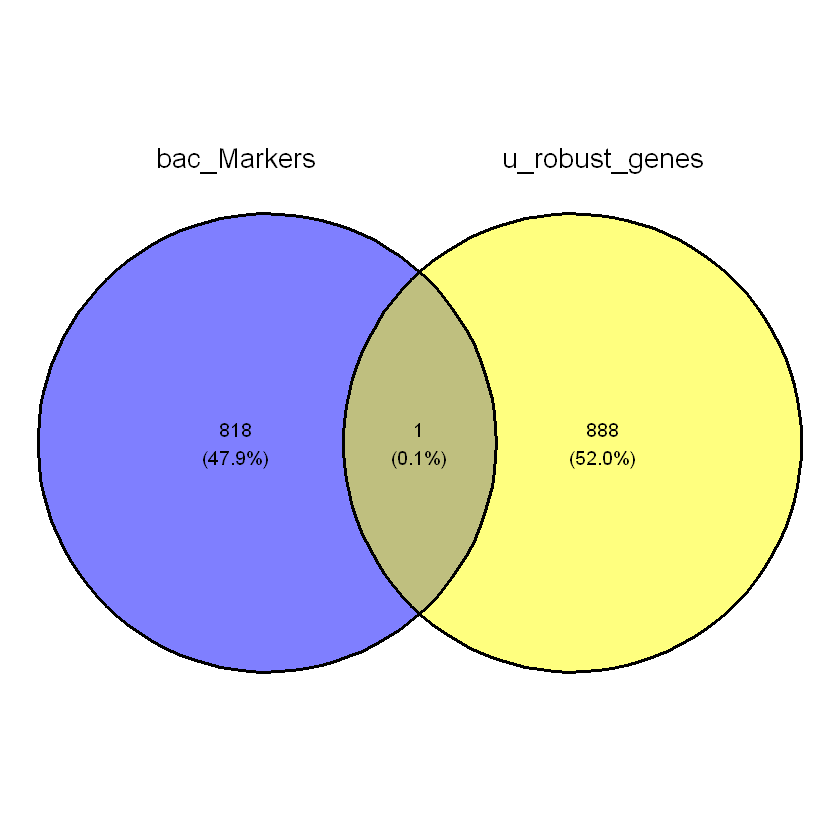

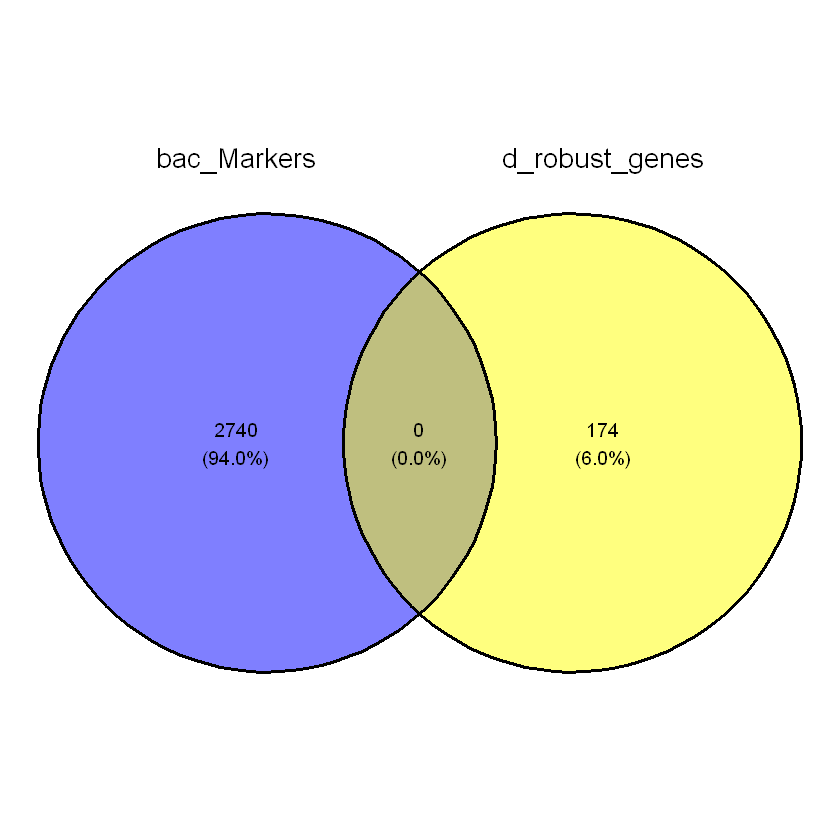

In [125]:
#Common genes between covid-19 robust markers and bacterial infection markers
#bac151
up_bac <- bac151 %>%
  filter(
    (FDR < 0.05),
    (logFC >= 0.6) )
down_bac <- bac151 %>%
  filter(
    (FDR < 0.05),
    (logFC <= -0.6) )
dim(up_bac)
dim(down_bac)
upbac<-up_bac[,c("GeneSymbol","FDR")]
downbac<-down_bac[,c("GeneSymbol","FDR")]

venn_bac_upmeta <- list(
  "bac_Markers" = upbac$GeneSymbol ,
  "u_robust_genes" = upMeta$GeneSymbol)
venn_sev_u  <- ggvenn(venn_bac_upmeta )
venn_sev_u 
robust_sev <- intersect( upMeta$GeneSymbol, bac151$GeneSymbol)
#down
venn_bac_downmeta <- list(
  "bac_Markers" = downbac$GeneSymbol ,
  "d_robust_genes" = downMeta$GeneSymbol)
venn_sev_u  <- ggvenn(venn_bac_downmeta)
venn_sev_u 


[1] 914   7

[1] 780   7

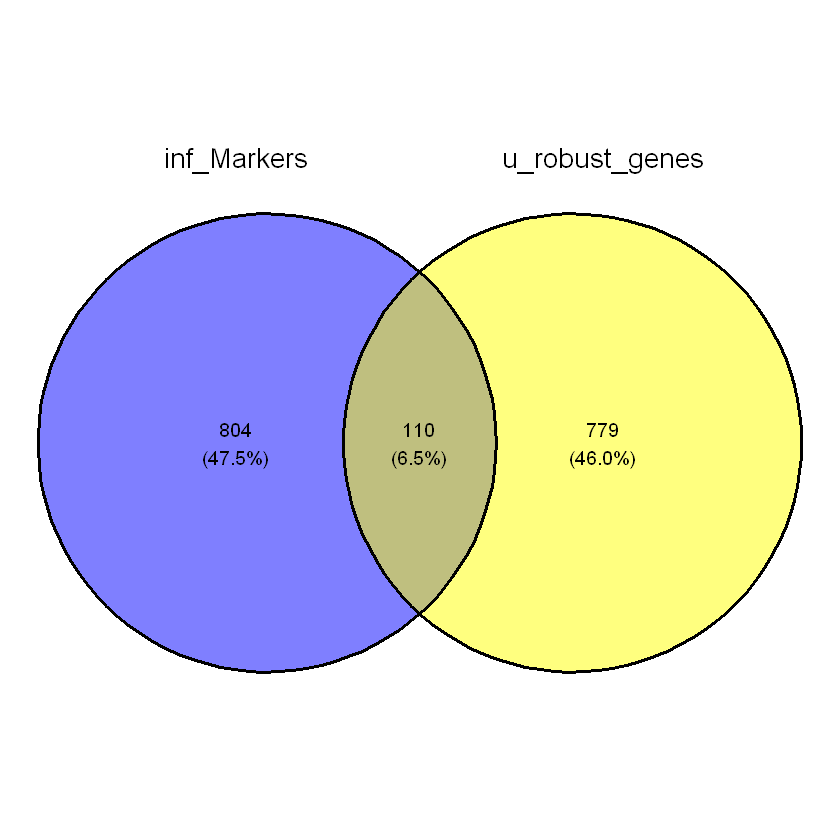

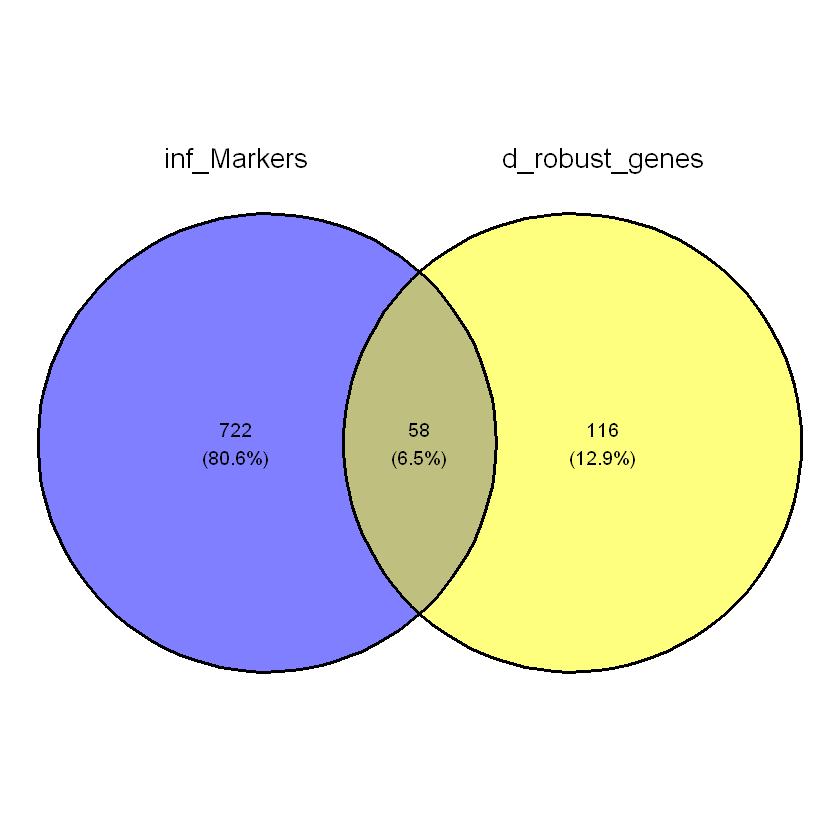

In [126]:
#Common genes between covid-19 robust markers and influenza markers
#inf151
up_inf <- inf151 %>%
  filter(
    (FDR < 0.05),
    (logFC >= 0.6) )
down_inf <- inf151 %>%
  filter(
    (FDR < 0.05),
    (logFC <= -0.6) )
dim(up_inf)
dim(down_inf)
upinf<-up_inf[,c("GeneSymbol","FDR")]
downinf<-down_inf[,c("GeneSymbol","FDR")]

venn_inf_upmeta <- list(
  "inf_Markers" = upinf$GeneSymbol ,
  "u_robust_genes" = upMeta$GeneSymbol)
venn_sev_u  <- ggvenn(venn_inf_upmeta )
venn_sev_u 
robust_sev <- intersect( upMeta$GeneSymbol, inf151$GeneSymbol)
#down
venn_inf_downmeta <- list(
  "inf_Markers" = downinf$GeneSymbol ,
  "d_robust_genes" = downMeta$GeneSymbol)
venn_sev_u  <- ggvenn(venn_inf_downmeta)
venn_sev_u 
#robust_sev <- intersect( upMeta$GeneSymbol, inf151$GeneSymbol)
#robust_sev

In [138]:
library(dplyr)
markers <- c('GALNT14', 'IGFBP2', 'INSC', 'ITGA7', 'MAOB', 'MZB1', 'NRN1', 'PPARG', 'PTGFR', 'SDC1', 'SPATC1', 'ZNF608')
sorted_upMeta <- upMeta %>% arrange(combined_pval)
marker_positions <- sapply(markers, function(gene) {
  position <- which(sorted_upMeta$GeneSymbol == gene)
  combined_pval <- if(length(position) > 0) sorted_upMeta$combined_pval[position] else NA
  return(c(position, combined_pval))})
marker_positions_df <- as.data.frame(t(marker_positions), stringsAsFactors = FALSE)
colnames(marker_positions_df) <- c("Position", "combined_pval")
marker_positions_df$GeneSymbol <- rownames(marker_positions_df)
rownames(marker_positions_df) <- NULL
print(marker_positions_df)

   Position combined_pval GeneSymbol
1        71  9.111061e-11    GALNT14
2       510  7.474045e-06     IGFBP2
3        34  2.289008e-12       INSC
4        44  6.284299e-12      ITGA7
5       222  4.107182e-08       MAOB
6        37  2.706571e-12       MZB1
7       275  1.742757e-07       NRN1
8        68  7.754500e-11      PPARG
9       124  1.506996e-09      PTGFR
10       33  2.132655e-12       SDC1
11       64  6.797857e-11     SPATC1
12      220  3.696325e-08     ZNF608


In [149]:
# internal control gene in highly robust results
control <- c("GAPDH", "ACTB", "B2M", "HPRT1", "RPLP0", "TBP", "PPIA", "YWHAZ")

# Filter significant DEGs for housekeeping genes
significant_controls <- significant_DEGs %>%
  filter(GeneSymbol %in% control)
significant_controls <- significant_controls %>%
  mutate(significant = combined_pval < 0.05)
print(significant_controls)

# A tibble: 0 × 14
# Rowwise: 
# ℹ 14 variables: GeneSymbol <chr>, pvalue_110 <dbl>, pvalue_641 <dbl>,
#   pvalue_151 <dbl>, direction_110 <chr>, direction_641 <chr>,
#   direction_151 <chr>, combined_pval <dbl>, logFC_110 <dbl>, logFC_641 <dbl>,
#   logFC_151 <dbl>, upregulated_count <dbl>, downregulated_count <dbl>,
#   significant <lgl>


In [152]:
#qPCR internal control genes in all metaanalysis results  
significant_c <- combined_data %>%
  filter(GeneSymbol %in% control)
significant_c
significant_c[,]

GeneSymbol,logCPM_110,F_110,PValue_110,FDR_110,EntrezGeneID_110,direction_151,combined_pval,logFC_110,logFC_641,logFC_151,upregulated_count,downregulated_count
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B2M,3.653405e-01,0.0003603864,0.1139688,down,up,down,3.166642e-03,-0.13336080,0.484173649,-0.9275324,0,1
GAPDH,3.777266e-05,0.0003804340,0.3892405,up,up,down,9.606119e-06,1.00725789,0.473494978,-0.3973895,1,0
RPLP0,2.208861e-05,0.0158469092,0.0618669,down,down,down,2.731961e-05,-0.80694994,-0.310106604,-0.9537319,0,2
TBP,6.041811e-06,0.0375995183,0.2219600,down,down,down,5.136136e-05,-0.26536408,-0.143416333,-0.2861799,0,0
YWHAZ,5.680370e-01,0.2371303808,0.2871639,up,up,down,3.992023e-01,0.05440303,0.102366828,-0.4622545,0,0
PPIA,2.944707e-01,0.5034549033,0.0733113,down,down,down,2.013174e-01,-0.15676523,-0.061374728,-0.7401938,0,1
HPRT1,4.228190e-01,0.8582477451,0.5273915,down,down,down,7.836167e-01,-0.10423557,-0.019999595,-0.1804651,0,0
ACTB,3.171639e-01,0.9760544352,0.5234929,up,up,down,7.416453e-01,0.19846790,0.004683669,-0.3214577,0,0


In [153]:
#Internal control genes in 114 data
c114 <- edgedata114 %>%
  filter(GeneSymbol %in% control)
c114


,logFC,logCPM,F,PValue,FDR,EntrezGeneID,GeneSymbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSG00000089157.15_RPLP0,0.60797807,8.686534,19.3887056,3.629092e-05,0.0002293442,6175,RPLP0
ENSG00000166710.17_B2M,-0.52461434,12.192962,15.8470639,1.619202e-04,0.0007858154,567,B2M
ENSG00000112592.13_TBP,0.57900212,2.705855,23.2024520,4.533849e-04,0.0018357430,6908,TBP
ENSG00000196262.13_PPIA,0.33804225,7.464244,7.2683709,8.728164e-03,0.0218402573,5478,PPIA
ENSG00000164924.17_YWHAZ,-0.09891179,9.299080,1.5259531,2.207290e-01,0.3104518386,7534,YWHAZ
ENSG00000111640.14_GAPDH,-0.10768491,10.357255,1.0497495,3.089884e-01,0.4074143193,2597,GAPDH
ENSG00000075624.13_ACTB,-0.13530670,10.111429,0.6216795,4.330074e-01,0.5321958978,60,ACTB
ENSG00000165704.14_HPRT1,-0.10193174,2.533133,0.4381526,6.182871e-01,0.7014580819,3251,HPRT1


In [90]:
#saving background genes for pathway enrichment analysis
b<-data.frame(combined_data$GeneSymbol)
write.table(b, file = "x_background.txt", sep = "\t", row.names = F, quote = F)